In [3]:
import matplotlib.pyplot as plt

In [2]:
print("hi")

hi


In [10]:
import matplotlib.pyplot as plt
import os
import numpy as np

import parsing
# import vertex
# import cell
# import data_holder
# import geometry

%matplotlib inline

In [11]:
data = parsing.read_data(
    os.path.join("data", "network_vertices.txt"),
    os.path.join("data", "cell_indices.txt"), 6, 6
)

[(0.930866, 0.271744), (0.116862, 0.802272), (0.563237, 1.233827), (0.349978, 1.81711), (0.375702, 2.313142), (0.604067, 2.999615), (0.299085, 3.474244), (-0.064818, 4.652581), (1.398975, -0.074888), (1.391676, 1.049655), (1.160173, 1.56442), (1.60824, 1.961066), (1.342551, 2.416602), (1.562803, 3.106261), (1.064323, 3.488212), (1.391571, 3.776807), (2.141749, 0.281557), (2.448764, 1.04931), (2.586193, 1.480577), (2.184154, 1.890135), (2.543788, 2.569701), (1.866666, 2.730649), (2.487271, 3.514713), (1.770058, 3.801211), (3.06361, 0.284279), (3.555957, 0.889567), (2.773178, 1.238788), (3.222748, 1.948208), (3.511009, 2.742986), (3.469543, 2.862983), (3.386142, 3.557367), (3.241826, 4.298552), (4.18583, 0.387196), (4.197804, 0.781788), (3.907473, 1.217865), (4.145059, 2.032152), (4.437937, 2.698011), (3.992574, 3.148598), (4.143524, 3.371457), (4.134823, 4.58872), (4.703293, 0.511607), (5.243425, 0.469836), (5.109806, 1.133103), (5.229939, 1.648571), (4.891341, 2.325022), (5.372004, 3.2

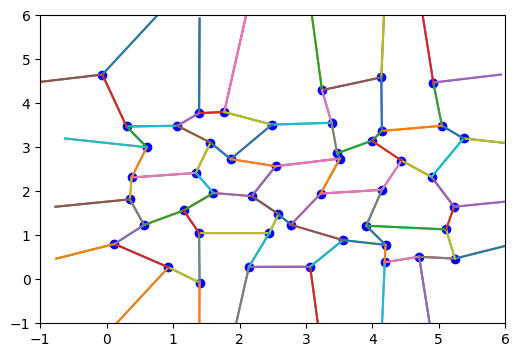

In [16]:
# This chunk graphs t = 0
# general setup
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
# graph vertices
for v in data.vert_list:
    plt.scatter(v.x, v.y, c = "blue")

# graph lines
for cell in data.cell_list:
    # xcoords = []
    # ycoords = []
    # # generate list of x coords
    # for i in range(len(cell.vert_obj_list)):
    #     xcoords.append(cell.vert_obj_list[i].x)
    # xcoords.append(cell.vert_obj_list[0].x)
    # # generate list of y coords
    # for i in range(len(cell.vert_obj_list)):
    #     ycoords.append(cell.vert_obj_list[i].y)
    # ycoords.append(cell.vert_obj_list[0].y)
    # ax.plot(xcoords, ycoords)
    for i in range(len(cell.vert_obj_list)):
        x1 = cell.vert_obj_list[i].x
        y1 = cell.vert_obj_list[i].y
        x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
        y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
        # if any boundaries broken, must check boundaries
        if abs(x1 - x2) > data.lx / 2 or abs(y1 - y2) > data.ly / 2:
            # segment 1
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x2 += data.lx
                else:
                    x1 += data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y2 += data.lx
                else:
                    y1 += data.lx
            ax.plot([x1, x2],
                    [y1, y2])
            # segment 2
            x1 = cell.vert_obj_list[i].x
            y1 = cell.vert_obj_list[i].y
            x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
            y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x1 -= data.lx
                else:
                    x2 -= data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y1 -= data.lx
                else:
                    y2 -= data.lx
            ax.plot([x1, x2],
                    [y1, y2])
        # no boundaries broken
        else:
            ax.plot([x1, x2],
                    [y1, y2])

In [17]:
data.cell_list[0].perimeter

7.433595605878034

NameError: name 'data' is not defined

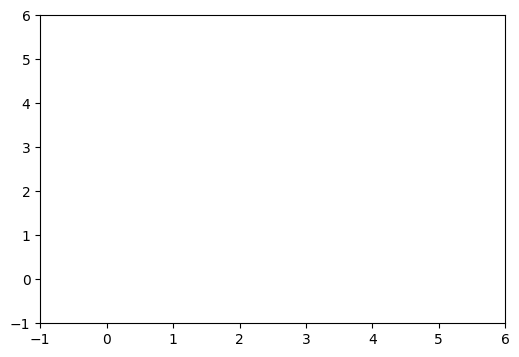

In [36]:
# This chunk graphs t = 0
lx = 9 * (2 / (3 * (3**0.5)))**0.5
ly = 4 * (2 / (3**0.5))**0.5
plt.figure(figsize = (6,4))
plt.xlim(-1, 6)
plt.ylim(-1, 6)
for v in data.vert_list:
    plt.scatter(v.x, v.y)

# for cell in data.cell_list:
#     x_poly, y_poly = cell.polygon.exterior.xy
#     plt.plot(x_poly, y_poly)

for cell in data.cell_list:
    x_poly, y_poly = data.cell_list[1].polygon.exterior.xy
    plt.plot(x_poly, y_poly)

In [6]:
d = np.array([1, 1])

In [7]:
d = np.array([[1, 2], [3, 4]])

In [8]:
d[0][0]

np.int64(1)

In [9]:
type(d)

numpy.ndarray

In [31]:
e = np.array([vertex.Vertex(1, 2), vertex.Vertex(1,4)])

In [32]:
a = cell.Cell(e)
a.vert_obj_list


array([V(1, 2), V(1, 4)], dtype=object)

In [33]:
b = cell.Cell(e)
b.vert_obj_list

array([V(1, 2), V(1, 4)], dtype=object)

In [34]:
e[0].x = 3

In [2]:
# Testing vertex_boundary_check
v = [vertex.Vertex(1, 1), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(3, 3), 
     vertex.Vertex(3, 1)]

In [3]:
v1 = [1, 1]
v2 = [4, 1]

In [4]:
hi = data_holder.Data_Holder(None, None)
geometry.__vertex_boundary_check(v1, v2, hi)

[-1, 1]

In [5]:
geometry.create_polygon(v, hi)

[[1, 1], [1, 3], [3, 3], [3, 1]]

In [6]:
v

[V(1, 1), V(1, 3), V(3, 3), V(3, 1)]

In [7]:
geometry.distance_formula([0,0], [1,1])

1.4142135623730951

In [8]:
joe = cell.Cell(v, hi)
joe

Polygon with vertices: [V(1, 1), V(1, 3), V(3, 3), V(3, 1)]

In [9]:
joe.fake_polygon

[[1, 1], [1, 3], [3, 3], [3, 1]]

In [ ]:
type(joe.area)

: 

In [11]:
joe.perimeter

8.0

In [12]:
joe.get_area()

In [ ]:
zed = 4
zed /= 1
zed

: 

In [ ]:
5 % 5

: 

NameError: name 'jljkljj' is not defined